<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир
В данном проекте необходимо определить параметры автоматизированной системы для отслеживания аномалий и мошеннической деятельности. Данные взяты из сервиса Яндекc Недвижимость, вкоючает в себя: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

### Вывод
В данных обнаружены:
пропуски значений;
неверные типы данных.
аномалии.


## Предобработка данных

In [7]:
data['days_exposition'] = data['days_exposition'].fillna(9999).astype('int')
data['total_images'] = data['total_images'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

Заменяем пропущенные значения на "0", также переводим типы данных в целочисленные.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Приводим столбец к нужному формату.

In [11]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Заполняем пропущенные значения медианой по столбцу.

In [13]:
livmed=(data['living_area']/data['total_area']).dropna().reset_index(drop=True).median()
livmed

0.5678598992678503

In [14]:
kitcmed=(data['kitchen_area']/data['total_area']).dropna().reset_index(drop=True).median()
kitcmed

0.1724137931034483

In [15]:
data['living_area'].fillna(livmed*data['total_area'], inplace=True)

In [16]:
data['kitchen_area'].fillna(kitcmed*data['total_area'], inplace=True)

Заполним пропуски в 'living_area' и 'kitchen_area' медианными значениями процентных соотношений (в м^2) кухни и жилплощади к общей площади квартиры.

In [18]:
data.dropna(subset=['locality_name'], inplace=True)

Удалим строки, где не указан населенный пункт

In [20]:
data.dropna(subset=['floors_total'], inplace=True)

Удалим строки, где не указано общее количество этажей

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Пропущенные значения балконов заменяем на 0, тк. считаем, что пропуски - это отсутствие балкона.
Парки и пруды заменяем на 0, потому что их значения на исследование не влияют.
    Пропуски обрабатываем для нормальной работы функций.
Также значения меняем на целочисленный формат для удобства работы с ними.
А в столбце days_exposition пропуски заменил на 9999, а не 0, чтобы на графике не было выбивающихся значений, поэтому и медиану не использовал. Данных и так достаточ
но.


## Расчёты и добавление результатов в таблицу

In [23]:
data['sq_price'] = (data['last_price'] / data['total_area']).astype('int')

Расчитали центу квадратного метра

In [25]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавили день недели, месяц и год публикации объявления

In [27]:
def name_f (row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['name_floors']=data.apply(name_f, axis=1)

Добавили этаж квартиры: варианты — первый, последний, другой

In [29]:
data['corr_liv']=(data['living_area'] / data['total_area'] * 100).astype('int')
data['corr_kitch']=(data['kitchen_area'] / data['total_area'] * 100).astype('int')

Добавили соотношение жилой и общей площади, а также отношение площади кухни к общей

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

Text(0, 0.5, 'Количество квартир')

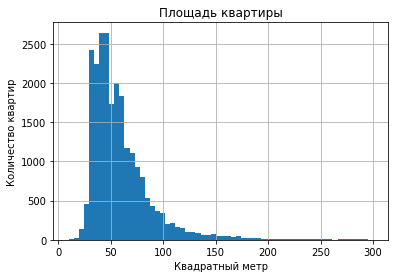

In [33]:
data['total_area'].hist(bins=60, range=(10,300))
plt.title('Площадь квартиры')
plt.xlabel('Квадратный метр')
plt.ylabel('Количество квартир')

Гистограмма для площади квартир

Text(0, 0.5, 'Количество квартир')

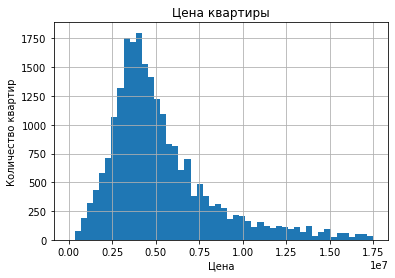

In [35]:
data['last_price'].hist(bins=50, range=(10000,17500000))
plt.title('Цена квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

Гистограмма для цены квартиры

Text(0, 0.5, 'Количество квартир')

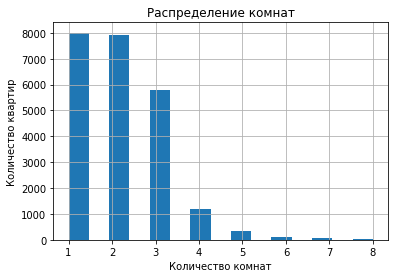

In [37]:
data['rooms'].hist(bins=15, range=(1,8))
plt.title('Распределение комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Гистограмма для количества комнат

Text(0, 0.5, 'Количество квартир')

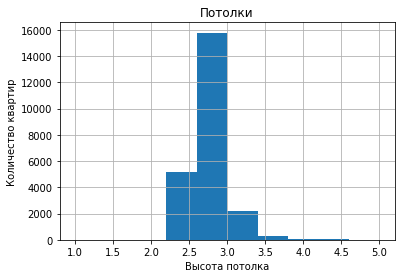

In [39]:
data['ceiling_height'].hist(bins=10, range=(1,5))
plt.title('Потолки')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')

Гистограмма для высоты потолков

Изучим время продажи квартиры

Text(0, 0.5, 'Количество квартир')

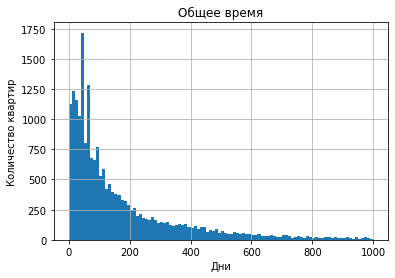

In [42]:
data['days_exposition'].hist(bins=100, range=(0,1000))
plt.title('Общее время')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')

In [46]:
data[data['days_exposition']!=9999]['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры - полгода.
Медианное значение - 95 дней.
Быстрые продажи те, что заняли не более 45 дней, а долгие, когда продажадлилась более 230 дней.


Выявим и уберем редкие и выбивающиеся значения


In [ ]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)


In [ ]:
data.describe()

Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года».

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [ ]:
data.pivot_table(index='total_area', values='last_price').plot(style='o',grid=True, figsize=(5,5))
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры')
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['total_area'].corr(data['last_price']))

Чем больше площадь, тем больше цена квартиры.

In [ ]:
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(5,5))
plt.xlabel('Число комнат')
plt.ylabel('Цена квартиры')
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['rooms'].corr(data['last_price']))


Чем больше комнат, тем больше цена

In [ ]:
data.query('name_floors != "другой"').pivot_table(index='name_floors', values='last_price').plot(grid=True, figsize=(5,5))
plt.xlabel('Этаж')
plt.ylabel('Цена квартиры')

Цена квартиры на первом этаже ниже цены квартиры последнего этажа

In [ ]:
data.pivot_table(index='cityCenters_nearest', values='last_price').plot(style='o',grid=True, figsize=(5,5))
plt.xlabel('Удаленность от  центра')
plt.ylabel('Цена квартиры')
data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['cityCenters_nearest'].corr(data['last_price']))

Чем ближе к центру, тем выше стоимость

In [ ]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(5,5))
plt.xlabel('День недели')
plt.ylabel('Цена квартиры')
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=10, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['weekday'].corr(data['last_price']))

Самые высокие цены обьявлений, опубликованных в среду, самые низкие - в субботу

In [ ]:
data.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(5,5))
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры')
data.plot(x='month', y='last_price', kind='hexbin', gridsize=30, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['month'].corr(data['last_price']))

В середине весны цены самые высокие, а с началом лета квартиры продаются дешевле

In [ ]:
data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(5,5))
plt.xlabel('Год')
plt.ylabel('Цена квартиры')
data.plot(x='year', y='last_price', kind='hexbin', gridsize=10, figsize=(5,5), sharex=False, grid=True)
print('Корреляция равна:', data['year'].corr(data['last_price']))

Самые дешевые квартиры были в 2016-2018 годах, а по приближению к кризисам - цены возрастают

Выберем 10 населённых пунктов с наибольшим числом объявлений
Посчитаем среднюю цену квадратного метра в этих населённых пунктах
Выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [ ]:
top=data.pivot_table(index = 'locality_name', values = 'sq_price', aggfunc=['count','mean'])
top.columns=['count','mean']
top=top.sort_values('count', ascending = False).head(10).astype('int')
top

In [ ]:
print('Самая высокая стоимость квадратного метра:',top['mean'].max(),', а самая низкая:',top['mean'].min())

Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая в Выборге

In [ ]:
data['near_centre']=data['cityCenters_nearest'] / 1000
data['near_centre']=data['near_centre'].fillna(9999).astype('int')
centre=data.query('locality_name == "Санкт-Петербург" and near_centre !=9999').pivot_table(index ='near_centre', values = 'last_price')
centre.plot(grid=True, figsize=(5,5), style='o')


Радиус центра питера составляет 7 км

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [ ]:
center_seg=data.query('near_centre <= 7 and locality_name == "Санкт-Петербург" and rooms!=0')

In [ ]:
center_rooms=center_seg.pivot_table(index='rooms', values=['last_price'],aggfunc='median').plot()
print('Корреляция равна:', data['year'].corr(data['last_price']))

Общая стоимость квартиры растет с количеством комнат

In [ ]:
center_floors=center_seg.pivot_table(index='name_floors', values=['last_price'],aggfunc='median').plot()

Самые дешевые квартиры в центре на первом этаже

In [ ]:
center_km=center_seg.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median',).plot()
center_seg.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(5,5), sharex=False, grid=True)

Зависимости цены от удаленности не наблюдается

In [ ]:
center_km=center_seg.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median',).plot()

In [ ]:
center_seg.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(5,5))
center_seg.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12,5))
center_seg.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(5,5))

В центре города по субботам цена объявления выше (возможно расчет на большее свободное время потенциальных покупателей, также на то, что в будни они работают)
В сентябре центы также растут, а под новый год снижаются
После кризиса квартиры поднялись в цене, затем рынок стабилизировался, ну и с санкциями цены вновь начали расти

## Общий вывод

Проанализировав данные сервиса Яндекс Недвижимость, мы научились определять рыночную стоимость жилья.
Для некоторых пропущенных значений мы нашли логическую замену, для других - заполнили нулями.
Произвели расчеты различных параметров, изучили их, а также визуализировали данные.
Все это позволило нам определить:
с увеличение площади квартиры как и числа комнат - увеличивается ее цена;
цена квартиры на первом этаже ниже той, что распологается на последнем;
удаленность жилья от центра города также влияет на ее стоимость;
в середине рабочей недели цены на выставленные обьявления выше, а ниже - в субботу;
весной цены на квартиры выше, а самые низкие - в июне;
дешевле всего квартиры продавались в спокойное время для экономики;
в Питере квартиры стоят дороже, чем в области;
центром Питера является область с радиусом 7 км:
при этом, в центре Питера и на удалении, рынок недвижимости ведет себя по-разному;
На цену квартиры влияют рразличные параметры.

Параметрами мошеннической деятельности можно считать умышленное занижение/завышение тех значений, которые влияют на цену квартиры. Грубо говоря, если цена квартиры сильно отличается от рынка таких же квартир (не учитывая форсмажоры).
